#### Data Reference

--- kaggle :-https://www.kaggle.com/datasets/ayushisinghaniya/housing-data

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import zipfile
from datetime import datetime as dt
import pickle

#importing dtale for visual assessment
import dtale
%matplotlib inline

#machine learning related libraries
from sklearn.model_selection import train_test_split

#import algorithm
from sklearn.linear_model import LinearRegression
from sklearn .tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#import evaluation metrics
from sklearn import metrics

In [2]:
df = pd.read_csv('boston.csv')

In [3]:
df.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9


In [4]:
df.shape

(506, 14)

In [5]:
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24

In [6]:
#From the metadata MEDV was the price, so i renamed it to price not to cause confusion
df.rename(columns = {'MEDV':'price'}, inplace = True)# price is in thousands

In [7]:
df.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

### checking for outliers
--- There are many ways to detect outlier , i used this method below due to a small dataset

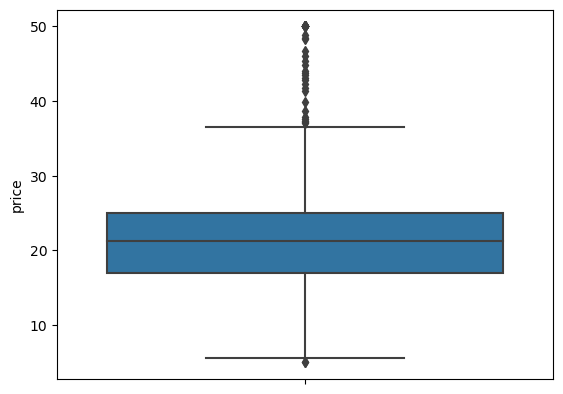

In [11]:
sb.boxplot(df, y = 'price');

### Treating the outlier

--- since we have a small dataset

In [12]:
df_1 = df[df['price']<36]

In [13]:
df_1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [14]:
df = df_1

In [15]:
df_1.shape

(462, 14)

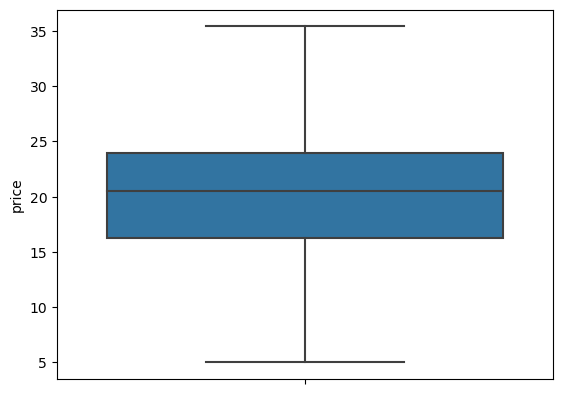

In [16]:
sb.boxplot(y = 'price', data =df_1);

In [17]:
pd.options.display.max_rows = 200
df_1.corr()['price']

CRIM      -0.504862
ZN         0.441228
INDUS     -0.603853
CHAS       0.110503
NOX       -0.588205
RM         0.555387
AGE       -0.578415
DIS        0.464345
RAD       -0.514726
TAX       -0.593381
PTRATIO   -0.477472
B          0.402508
LSTAT     -0.780977
price      1.000000
Name: price, dtype: float64

<AxesSubplot:>

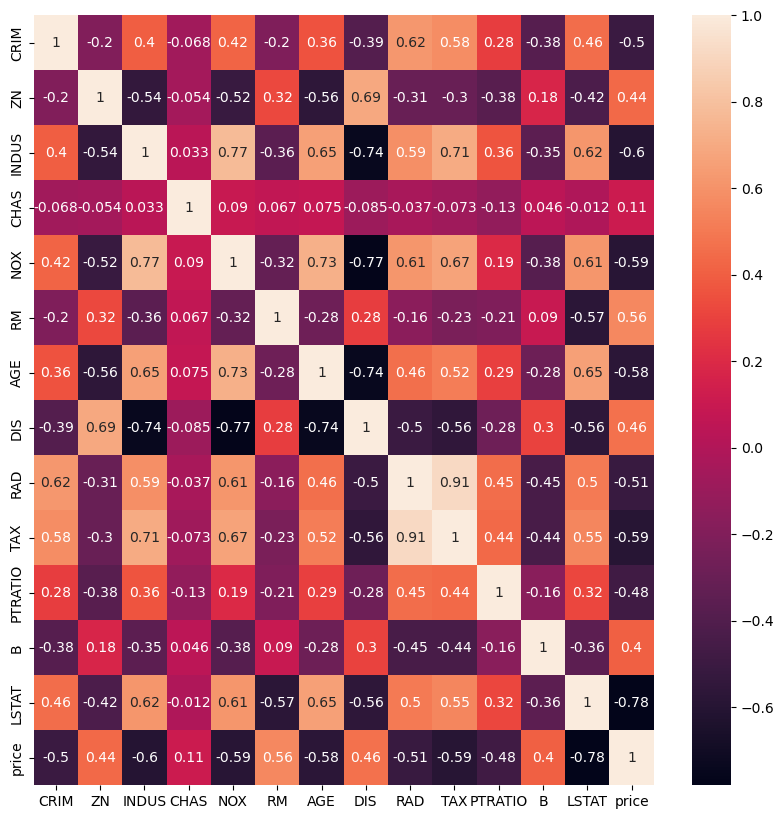

In [18]:
plt.figure(figsize = (10,10))
sb.heatmap(df_1.corr(), annot = True)

In [19]:
df_1['CRIM'].value_counts()

14.33370    2
0.00632     1
0.02498     1
0.04301     1
0.01709     1
           ..
2.14918     1
1.12658     1
1.49632     1
1.65660     1
0.04741     1
Name: CRIM, Length: 461, dtype: int64

## Training thr model

In [20]:
X = df_1.drop('price', axis= 1).values
y = df['price'].values

In [21]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [22]:
y

array([24. , 21.6, 34.7, 33.4, 28.7, 22.9, 27.1, 16.5, 18.9, 15. , 18.9,
       21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6, 15.2,
       14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2, 13.1,
       13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7, 21.2,
       19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9, 35.4,
       24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5, 19.4,
       22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. , 20.8,
       21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2, 23.6,
       28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 33.2, 27.5, 26.5,
       18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4, 21.7, 22.8, 18.8,
       18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. , 20.3, 20.5, 17.3,
       18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6, 23. , 18.4, 15.6,
       18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4, 15.6, 11.8, 13.8,
       15.6, 14.6, 17.8, 15.4, 21.5, 19.6, 15.3, 19

In [23]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 101)

In [24]:
X_train

array([[4.29400e-02, 2.80000e+01, 1.50400e+01, ..., 1.82000e+01,
        3.96900e+02, 1.05900e+01],
       [8.24400e-02, 3.00000e+01, 4.93000e+00, ..., 1.66000e+01,
        3.79410e+02, 6.36000e+00],
       [2.45220e-01, 0.00000e+00, 9.90000e+00, ..., 1.84000e+01,
        3.96900e+02, 1.59400e+01],
       ...,
       [1.58744e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 2.10800e+01],
       [9.37800e-02, 1.25000e+01, 7.87000e+00, ..., 1.52000e+01,
        3.90500e+02, 1.57100e+01],
       [8.71675e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.91980e+02, 1.71200e+01]])

In [25]:
X_test

array([[1.25790e-01, 4.50000e+01, 3.44000e+00, ..., 1.52000e+01,
        3.82840e+02, 4.56000e+00],
       [2.54300e-02, 5.50000e+01, 3.78000e+00, ..., 1.76000e+01,
        3.96900e+02, 7.18000e+00],
       [2.79570e-01, 0.00000e+00, 9.69000e+00, ..., 1.92000e+01,
        3.96900e+02, 1.35900e+01],
       ...,
       [5.82401e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.07400e+01],
       [4.26131e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.90740e+02, 1.26700e+01],
       [1.23290e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.94950e+02, 1.62100e+01]])

In [26]:
y_train

array([20.6, 23.7, 19.8, 24.4, 18.8, 15. , 26.2, 29.9, 14.1, 13.9, 22.7,
       17.5, 25.3, 12.7, 32.7, 12.6, 24.4, 21.6, 17.8, 25.2, 17.8, 14.9,
       20. , 13.1, 21.7, 13.8, 19.6, 18.3, 13.8, 22. , 15.1, 23.2, 20.3,
       23.8, 16.2, 29.4, 32. , 22.1, 21.9, 16. , 21.9, 20.7, 19.9, 17.1,
       10.2, 23.2, 35.4, 24.8, 25.1, 26.7, 17.9, 13.4, 12.7,  9.6, 18.2,
       25. , 29. , 32.5, 18.6, 13.5, 22.5, 21.4,  8.5,  5. , 15.7, 33.1,
       17.1,  8.3, 22.8, 10.8, 19.6, 20.5, 12.8, 19.2, 22.2, 17.4, 26.6,
       13.3, 13.1, 23.9, 22.5, 20.8, 29. , 17.5, 20. , 14.2,  9.5, 19. ,
       20.1, 34.6, 14.9, 16.4, 20.5, 28.2, 24.1, 24.7, 16.3, 22.5, 17.8,
       23.8, 30.5, 22.8, 26.4, 23.9, 20.4, 11.7, 20. , 10.2, 24.7, 18.9,
       21.6, 19.4, 30.7, 19.5, 23. , 14.6, 20.1, 19.4, 10.4,  5. , 22. ,
       17.5, 20.1, 16.6,  6.3,  8.3, 22.8, 23.1,  8.1, 24.3, 31.7,  7.2,
        7. , 25. ,  5.6, 14.5, 24.7, 27.1, 17.2, 28.7, 20.5, 23.9, 27.1,
       19.8, 22.4, 17.8, 35.4, 31. , 22. , 19.9, 14

In [27]:
y_test

array([29.8, 23.9, 24.5, 11.5, 13.6, 27. , 22.6, 20.3, 15.2, 13.6, 22.9,
       24.8, 20.4, 21.7, 25. , 14.3, 20.3, 33.1, 28.4, 20.6, 26.5, 21.7,
       34.9,  8.8, 16.1, 21.2, 21.4, 24.2, 30.1, 23.4, 21.1, 17.2, 24.6,
       29.6, 31.1,  7.2, 23.9, 19.7, 13.3, 30.1, 19.2, 34.7, 12. , 13.2,
        7. , 34.9, 23.1, 33.8, 24. , 11.8, 13.9, 22. , 18.9, 30.1, 20.6,
       21.8, 30.8, 22.3, 30.3, 13.4, 19.3, 28.7, 17.4, 18.5, 21.5, 23.2,
       33.2, 22. , 22.6, 22.3, 20.4, 23.3, 13.4,  8.4, 21.2, 21. , 28.1,
       19.9, 21.1, 24.6, 18.4, 23.1, 11.8, 21.8, 31.6, 22.6, 19.4, 28.6,
       18.9, 32.2, 14.4, 23. , 23.6, 25. , 28.7, 16.7, 23.5, 31.5, 19.6,
       19.5, 15. , 23.7, 19.3, 21.7, 24.1, 24.3, 12.5, 31.6, 10.4, 31.5,
       15.6, 19.4, 19.4, 23.3, 18.2,  7.5, 23.1, 22. , 18.2, 29.1, 24.4,
       20.4, 33.4, 18.4, 17.2, 23.7, 13.1, 32.4, 20.2, 12.1, 34.9, 16.1,
       27.5, 22.2, 23.8, 21.4, 23. , 22.6, 18.8])

In [28]:
ln = LinearRegression()

In [29]:
ln.fit(X_train , y_train)

LinearRegression()

In [30]:
lnprediction = ln.predict(X_test)

In [31]:
lnprediction

array([29.33706245, 25.39537298, 20.63627477, 14.95923329, 14.71204426,
       27.00733831, 22.94454147, 20.5767582 , 17.06443397, 13.2010713 ,
       26.13865325, 25.13173942, 20.07755613, 19.19605246, 23.76242289,
       15.78718549, 20.9888678 , 29.80580463, 27.78337496, 20.58029371,
       22.68997734, 23.97310263, 30.40137768,  2.88405566, 20.72058452,
       20.71637958, 23.59083717, 24.3311637 , 29.63198508, 23.74585935,
       21.65837256, 14.41033301, 26.62770038, 24.07312675, 29.36607361,
        9.7657758 , 23.4714519 , 16.23424226, 16.91241186, 25.40308596,
       22.31257135, 26.54535591, 12.64820911, 11.4792739 , -0.46370258,
       27.57269826, 22.62628018, 29.12850148, 24.25006025, 11.89221716,
       15.6405456 , 20.99158935, 19.66048582, 26.39547686, 21.16496135,
       21.13611026, 28.89529464, 23.1697853 , 29.11738135, 14.34426713,
       19.54916027, 24.98747454, 15.65000694, 20.50363373, 19.14101157,
       24.83554425, 29.33846249, 24.98552449, 23.70979626, 26.22

In [32]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,lnprediction))
print('Mean squared Error:',metrics.mean_squared_error(y_test,lnprediction))
print('Root mean square Error:',np.sqrt(metrics.mean_squared_error(y_test,lnprediction)))

Mean Absolute Error: 2.38505722735014
Mean squared Error: 9.55810661107072
Root mean square Error: 3.0916187687149783


In [33]:
print('Explained variance score:',metrics.explained_variance_score(y_test,lnprediction))

Explained variance score: 0.7720113432298672


In [34]:
dtreemodel = DecisionTreeRegressor()

In [35]:
dtreemodel.fit(X_train,y_train)

DecisionTreeRegressor()

In [36]:
dtreeprediction = dtreemodel.predict(X_test)

In [37]:
dtreeprediction

array([30.5, 23.9, 20.3, 12.3, 15.7, 25. , 24.7, 20.4, 14.9, 17.3, 21.6,
       22.2, 19.9, 23.2, 29.8, 14.1, 29.6, 32. , 32. , 19.9, 28.4, 23.4,
       33.3,  8.3, 19.3, 20.1, 21.6, 24.1, 31. , 24.7, 20.6, 16.3, 22.2,
       28.5, 30.5, 10.2, 29.8, 18.5, 10.9, 30.5, 19.1, 31.7, 13.9, 23.2,
        7.2, 32.9, 21.6, 31. , 21. , 15.6, 16.6, 29.6, 27.1, 27.5, 21.2,
       18.7, 30.5, 23.8, 34.6, 20. , 20.1, 23.7, 18.1, 19. , 25. , 22.6,
       31.7, 34.6, 23.7, 23.2, 22.1, 22.2, 14.1,  8.4, 19.4, 24.7, 25. ,
       20.8, 22.5, 25. , 18.1, 24.7, 13.4, 18.3, 32.7, 22. , 19.4, 27.1,
       17.5, 34.6, 14.3, 21.6, 22. , 24.4, 24.7, 14.9, 23.7, 28.4, 19.2,
       19. , 29.8, 18.5, 20.9, 19.3, 30.5, 22.8, 14.9, 26.7, 10.9, 31.7,
       13.1, 18.2, 18.5, 23.1, 18.5, 11. , 27.5, 23.3, 20.1, 30.5, 17.5,
       18.5, 28.2, 17.4, 16.3, 23.7, 15.4, 28. , 18.5,  9.5, 24.8, 14.9,
       16.3, 21.2, 23.1, 16.1, 21.7, 21.4, 19.5])

In [38]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,dtreeprediction))
print('Mean squared Error:',metrics.mean_squared_error(y_test,dtreeprediction))
print('Root mean square Error:',np.sqrt(metrics.mean_squared_error(y_test,dtreeprediction)))

Mean Absolute Error: 2.3388489208633096
Mean squared Error: 12.071438848920865
Root mean square Error: 3.474397623894085


In [39]:
print('Explained variance score:',metrics.explained_variance_score(y_test, dtreeprediction))

Explained variance score: 0.7053945432153738


In [40]:
rfmodel = RandomForestRegressor()

In [41]:
rfmodel.fit(X_train,y_train)

RandomForestRegressor()

In [42]:
rfprediction = rfmodel.predict(X_test)

In [43]:
rfprediction

array([27.891, 26.322, 20.142, 11.716, 15.162, 25.259, 21.933, 21.785,
       16.027, 15.684, 22.744, 23.333, 19.678, 20.317, 26.859, 15.112,
       22.309, 30.658, 26.463, 21.028, 26.937, 21.627, 32.111,  7.63 ,
       19.808, 19.675, 21.833, 23.856, 27.693, 23.779, 20.496, 13.775,
       23.38 , 29.218, 28.642,  8.707, 25.357, 18.748, 12.257, 30.158,
       19.968, 32.452, 13.084, 16.658,  9.035, 31.634, 22.141, 29.677,
       22.539, 15.183, 16.301, 22.355, 19.757, 26.149, 19.046, 20.269,
       27.157, 22.503, 31.053, 16.01 , 20.036, 23.566, 16.275, 19.506,
       19.781, 22.376, 32.286, 28.538, 23.331, 23.131, 21.964, 22.728,
       14.811, 10.854, 21.267, 21.045, 24.017, 20.727, 21.417, 24.205,
       16.411, 23.857, 10.691, 18.931, 29.482, 21.764, 18.266, 26.09 ,
       19.87 , 30.626, 14.445, 21.985, 22.165, 25.077, 23.946, 15.916,
       23.224, 27.581, 19.314, 19.687, 25.434, 18.73 , 20.943, 18.134,
       25.694, 24.367, 13.868, 29.379, 11.649, 31.466, 16.43 , 20.279,
      

In [44]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,rfprediction))
print('Mean squared Error:',metrics.mean_squared_error(y_test,rfprediction))
print('Root mean square Error:',np.sqrt(metrics.mean_squared_error(y_test,rfprediction)))

Mean Absolute Error: 1.7374460431654677
Mean squared Error: 6.158079719424459
Root mean square Error: 2.481547847498504


In [45]:
print('Explainned variance score:', metrics.explained_variance_score(y_test,rfprediction))

Explainned variance score: 0.8541715514446554


### At the end of the day we see that RandomForestRegressor is the best algorithm for this analysis 

#### I used just three algorithm there are also more